# Lab 10

In this lab we discuss sampling distribution and central limit theorem.

## Sampling Distribution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**np.random.normal:** https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

**np.concatenate:** https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

In [2]:
# First we generate two normal distributions of mass values for males and females.
# Then we concatenate these two arrays and create the dataframe "df_mass".
np.random.seed(0)
male_mass = np.random.normal(loc = 180, scale = 30, size = 2000)
female_mass = np.random.normal(loc = 140, scale = 20, size = 2000)
all_values = np.concatenate((male_mass, female_mass), axis = 0)
df_mass = pd.DataFrame({'people_mass': all_values})

In [3]:
# Let's see the first 5 rows of the dataframe!
df_mass.head()

,people_mass
0,232.921570
1,192.004716
2,209.362140
3,247.226796
4,236.026740


In [4]:
# Calculating summary statistics for the variable "people_mass"
df_mass.describe()

,people_mass
count,4000.000000
mean,159.411846
std,32.087054
min,65.197987
25%,135.918187
50%,155.533992
75%,180.564731
max,275.129243


**sns.set_theme:** https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme

**sns.histplot:** https://seaborn.pydata.org/generated/seaborn.histplot.html

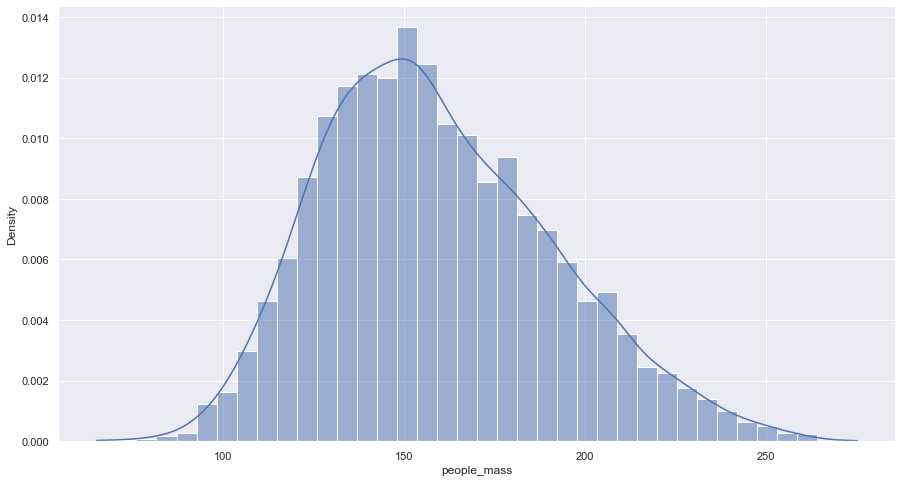

In [5]:
# We can see the distribution of the values in the column "people_mass".
# This is not a normal distribution!
sns.set_theme(rc = {'figure.figsize':(15, 8)})
sns.histplot(df_mass['people_mass'], stat = 'density', kde = True)
plt.show()

**np.random.choice:** https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [6]:
# Function for creating the list of sample means
# The number of samples is "n_samples" and size of each sample is "sample_size".
# We calculate the mean of each sample and store all those sample mean values in the list "sample_means".
def sample_mean_calculator(population_array, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(population_array, size = sample_size)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    return sample_means

In [7]:
# Taking 1000 samples each of 10 random values with replacement!
sample_means_10 = sample_mean_calculator(df_mass['people_mass'], 10, 1000)

In [8]:
# Taking 1000 samples each of 30 random values with replacement!
sample_means_30 = sample_mean_calculator(df_mass['people_mass'], 30, 1000)

In [9]:
# Taking 1000 samples each of 100 random values with replacement!
sample_means_100 = sample_mean_calculator(df_mass['people_mass'], 100, 1000)

In [10]:
# Taking 1000 samples each of 200 random values with replacement!
sample_means_200 = sample_mean_calculator(df_mass['people_mass'], 200, 1000)

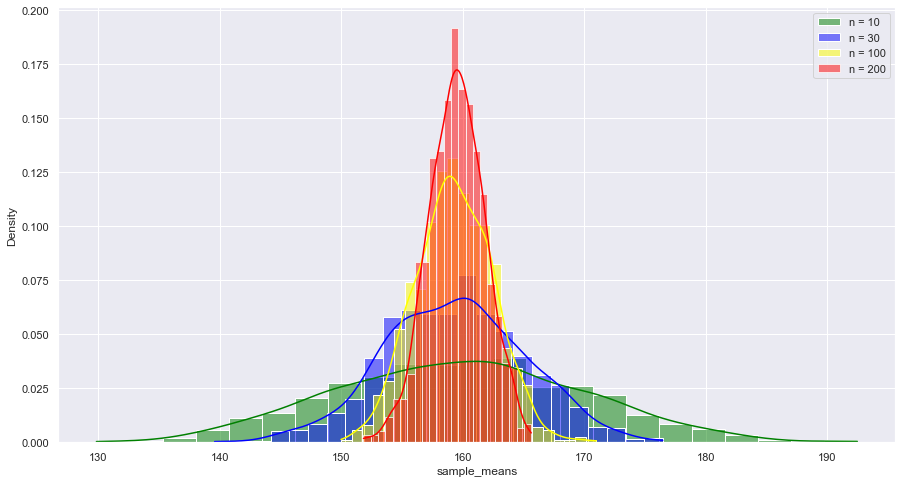

In [11]:
# Let's view the distribution of the sample_means values!
# The distribution of sample means for n = 200 looks normal!
# The red curve is fairly symmetrical around the central value and the median is roughly equivalent to the mean.
# Sampling a sufficient number of times with a sufficient size will result in a normal distribution of sample means.
sns.histplot(sample_means_10, stat = 'density', color = "green", label = "n = 10", kde = True)
sns.histplot(sample_means_30, stat = 'density', color = "blue", label = "n = 30", kde = True)
sns.histplot(sample_means_100, stat = 'density', color = "yellow", label = "n = 100", kde = True)
sns.histplot(sample_means_200, stat = 'density', color = "red", label = "n = 200", kde = True)
plt.xlabel("sample_means")
plt.legend()
plt.show()

In [12]:
# Let's check the mean of sample_means_200!
# This value is close to the meean of "people_mass".
np.mean(sample_means_200)

159.50252788067945

In [13]:
# Let's check the standard deviation of sample_means_200!
np.std(sample_means_200, ddof = 1)

2.2796728551263783

In [14]:
# The standard deviation of sample means is called the standard error (SE).
# We can calculate the standard error by just using the standard deviation of "people_mass" and sample size.
# We see that SE is roughly equal to the standard deviation of sample_means_200.
SE = np.std(df_mass['people_mass'], ddof = 1) / np.sqrt(200)
SE

2.2688973280058047